# **Parcial 2 H2IA**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Nombres de columnas según la tabla de variables del Adult Census
COLUMN_NAMES = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country",
    "income"
]


In [ ]:
# Rutas
train_path = "/content/adult.data"
test_path  = "/content/adult.test"

# --- Carga del entrenamiento ---
train_df = pd.read_csv(
    train_path,
    names=COLUMN_NAMES,
    header=None,
    na_values="?",           # marca los "?" como valores faltantes
    skipinitialspace=True    # quita espacios después de comas
)

# --- Carga del test  ---
test_df = pd.read_csv(
    test_path,
    names=COLUMN_NAMES,
    header=None,
    na_values="?",
    skipinitialspace=True,
    comment="|"              # ignora líneas de comentarios/metadatos del archivo .test
)

# Normaliza la etiqueta del .test: en ese archivo viene con punto final (">50K." / "<=50K.")
test_df["income"] = test_df["income"].str.strip().str.replace(r"\.", "", regex=True)


In [ ]:
# Train
X_train = train_df.drop(columns=["income"])
y_train = train_df["income"]

# Test: dividir 50/50 en validación y prueba
X_tmp = test_df.drop(columns=["income"])
y_tmp = test_df["income"]

X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp,
    test_size=0.5,           # 50/50
    stratify=y_tmp,          # mantiene la proporción de clases en ambos subconjuntos
    random_state=42          # reproducibilidad
)

# Comprobación rápida de tamaños
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:  ", X_val.shape,   "y_val:  ", y_val.shape)
print("X_test: ", X_test.shape,  "y_test: ", y_test.shape)


X_train: (32561, 14) y_train: (32561,)
X_val:   (8140, 14) y_val:   (8140,)
X_test:  (8141, 14) y_test:  (8141,)


###EDA ###

In [ ]:
!pip -q install "ydata-profiling>=4.16.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00


In [ ]:
#  Imports
from ydata_profiling import ProfileReport
from IPython.display import IFrame, display

#  Unir features + target para perfilar cada split
df_train = pd.concat([X_train, y_train.rename("income")], axis=1)
df_val   = pd.concat([X_val,   y_val.rename("income")],   axis=1)
df_test  = pd.concat([X_test,  y_test.rename("income")],  axis=1)

#  Reporte completo en TRAIN:
profile_train = ProfileReport(
    df_train,
    title="Adult Census - TRAIN Profile",
    explorative=True
)
profile_train.to_file("/content/adult_train_profile.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:01<00:00,  8.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Reportes ligeros en VAL/TEST:
profile_val  = ProfileReport(df_val,  title="Adult Census - VAL Profile",  minimal=True)
profile_test = ProfileReport(df_test, title="Adult Census - TEST Profile", minimal=True)

profile_val.to_file("/content/adult_val_profile.html")
profile_test.to_file("/content/adult_test_profile.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 66.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 40.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Limpieza de Datos

In [ ]:
# 1) Copias de trabajo para no tocar los originales
X_train_cln = X_train.copy()
X_val_cln   = X_val.copy()
X_test_cln  = X_test.copy()

In [ ]:
import numpy as np

# 2) Identificar columnas categóricas y numéricas
cat_cols = X_train_cln.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train_cln.select_dtypes(include=[np.number]).columns.tolist()


In [ ]:
# 3) Normalizar strings: quitar espacios y homogeneizar nulos -> "Unknown"
def clean_categoricals(df, cats):
    # strip espacios y pasar NaN/None/"nan" a "Unknown"
    for c in cats:
        # convertir a string manteniendo NaN
        df[c] = df[c].astype("string")  # dtype string maneja bien NA
        # quitar espacios
        df[c] = df[c].str.strip()
        # reemplazar nulos por "Unknown"
        df[c] = df[c].fillna("Unknown")
    return df

for d in (X_train_cln, X_val_cln, X_test_cln):
    clean_categoricals(d, cat_cols)

In [ ]:
# 4) Eliminar columnas según profiling/guía:
# 4.1) fnlwgt (peso muestral) -> generalmente no aporta al modelo individual
drop_cols = []
if "fnlwgt" in X_train_cln.columns:
    drop_cols.append("fnlwgt")

# 4.2) Redundancia education vs education-num
#     Si education → education-num es mapeo 1→1 en TRAIN, eliminamos 'education'
if "education" in X_train_cln.columns and "education-num" in X_train_cln.columns:
    nunq = X_train_cln.groupby("education")["education-num"].nunique(dropna=False)
    is_bijection = (nunq.max() == 1)
    if is_bijection:
        drop_cols.append("education")
        redundant_note = "Se eliminó 'education' (mapeo 1→1 con 'education-num')."
    else:
        redundant_note = "NO se eliminó 'education' (no hay mapeo 1→1 con 'education-num')."
else:
    redundant_note = "Columnas 'education' y/o 'education-num' no presentes; no se evaluó redundancia."

# Aplicar drops
if drop_cols:
    X_train_cln = X_train_cln.drop(columns=drop_cols)
    X_val_cln   = X_val_cln.drop(columns=drop_cols, errors="ignore")
    X_test_cln  = X_test_cln.drop(columns=drop_cols, errors="ignore")


In [ ]:
# 5) Balanceo df: calcular class_weight a partir de y_train
#    Fórmula: w_c = N / (K * n_c)
y_train_str = y_train.astype(str).str.strip()
class_counts = y_train_str.value_counts()
N = len(y_train_str)
K = class_counts.shape[0]
class_weight_dict = {cls: N / (K * cnt) for cls, cnt in class_counts.items()}

In [ ]:
# 6) Reporte
print("=== Limpieza y Balanceo: Resumen ===")
print(f"Categorías tratadas como 'Unknown' en: {cat_cols}")
if drop_cols:
    print("Columnas eliminadas:", drop_cols)
else:
    print("No se eliminaron columnas por profiling.")
print("Redundancia education/education-num:", redundant_note)

print("\n▶ Balance de clases (TRAIN)")
display(pd.DataFrame({
    "count": class_counts,
    "proportion": (class_counts / class_counts.sum()).round(4),
    "class_weight": [class_weight_dict[c] for c in class_counts.index]
}))

print("\nTamaños finales:")
print("X_train_cln:", X_train_cln.shape, "y_train:", y_train.shape)
print("X_val_cln:  ", X_val_cln.shape,   "y_val:  ", y_val.shape)
print("X_test_cln: ", X_test_cln.shape,  "y_test: ", y_test.shape)


=== Limpieza y Balanceo: Resumen ===
Categorías tratadas como 'Unknown' en: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
Columnas eliminadas: ['fnlwgt', 'education']
Redundancia education/education-num: Se eliminó 'education' (mapeo 1→1 con 'education-num').

▶ Balance de clases (TRAIN)


,count,proportion,class_weight
income,,,
<=50K,24720,0.7592,0.658596
>50K,7841,0.2408,2.076330



Tamaños finales:
X_train_cln: (32561, 12) y_train: (32561,)
X_val_cln:   (8140, 12) y_val:   (8140,)
X_test_cln:  (8141, 12) y_test:  (8141,)


Procesamiento

In [ ]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
for v in ["X_train_cln","X_val_cln","X_test_cln"]:
    assert v in globals(), f"Falta {v}. Ejecuta antes la celda de limpieza."

# 1) Recalcular columnas categóricas y numéricas
cat_cols = X_train_cln.select_dtypes(include=["object","string"]).columns.tolist()
num_cols = X_train_cln.select_dtypes(include=[np.number]).columns.tolist()


# 2) OneHotEncoder
skl_major, skl_minor = map(int, sklearn.__version__.split(".")[:2])
if (skl_major > 1) or (skl_major == 1 and skl_minor >= 2):
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False, dtype=np.float32)
else:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False, dtype=np.float32)

scaler = StandardScaler(with_mean=True, with_std=True)

preprocess = ColumnTransformer(
    transformers=[
        ("num", scaler, num_cols),
        ("cat", ohe,   cat_cols),
    ],
    remainder="drop"
)

# 3) Ajuste con TRAIN
preprocess.fit(X_train_cln)

# 4) Transformar splits
X_train_enc = preprocess.transform(X_train_cln)
X_val_enc   = preprocess.transform(X_val_cln)
X_test_enc  = preprocess.transform(X_test_cln)

# 5) Etiqueta binaria
label_map = {"<=50K": 0, ">50K": 1}
y_train_bin = y_train.astype(str).str.strip().map(label_map).astype(np.int64)
y_val_bin   = y_val.astype(str).str.strip().map(label_map).astype(np.int64)
y_test_bin  = y_test.astype(str).str.strip().map(label_map).astype(np.int64)

print("\nFormas finales:")
print("X_train_enc:", X_train_enc.shape, "| y_train_bin:", y_train_bin.shape)
print("X_val_enc:  ", X_val_enc.shape,   "| y_val_bin:  ", y_val_bin.shape)
print("X_test_enc: ", X_test_enc.shape,  "| y_test_bin: ", y_test_bin.shape)


Formas finales:
X_train_enc: (32561, 91) | y_train_bin: (32561,)
X_val_enc:   (8140, 91) | y_val_bin:   (8140,)
X_test_enc:  (8141, 91) | y_test_bin:  (8141,)


In [ ]:
# Los primeros len(num_cols) son las numéricas estandarizadas
n_num = len(num_cols)
Xn = X_train_enc[:, :n_num]

print("Media TRAIN numéricas (≈ 0):", np.round(Xn.mean(axis=0), 4))
print("Desv. std TRAIN numéricas (≈ 1):", np.round(Xn.std(axis=0, ddof=0), 4))

Media TRAIN numéricas (≈ 0): [-0.  0. -0.  0.  0.]
Desv. std TRAIN numéricas (≈ 1): [1. 1. 1. 1. 1.]


Visualización

In [ ]:
# 1) Nombres de columnas resultantes
ohe = preprocess.named_transformers_["cat"]
try:
    cat_names = ohe.get_feature_names_out(cat_cols)
except AttributeError:  # fallback para versiones viejas
    cat_names = ohe.get_feature_names(cat_cols)
feature_names = list(num_cols) + list(cat_names)

#scalers

X_train_scaled = X_train_enc
y_train_scaled = np.asarray(y_train_bin, dtype=np.float32).reshape(-1, 1)

X_val_scaled = X_val_enc
y_val_scaled = np.asarray(y_val_bin, dtype=np.float32).reshape(-1, 1)

X_test_scaled = X_test_enc
y_test_scaled = np.asarray(y_test_bin, dtype=np.float32).reshape(-1, 1)

print("Shapes:")
print("X_train_scaled:", X_train_scaled.shape)
print("y_train_scaled:", y_train_scaled.shape)

print("X_val_scaled:", X_val_scaled.shape)
print("y_val_scaled:", y_val_scaled.shape)

print("X_test_scaled:", X_test_scaled.shape)
print("y_test_scaled:", y_test_scaled.shape)


# 2) DataFrames procesados
X_train_enc_df = pd.DataFrame(X_train_enc, columns=feature_names, index=X_train_cln.index)
X_val_enc_df   = pd.DataFrame(X_val_enc,   columns=feature_names, index=X_val_cln.index)
X_test_enc_df  = pd.DataFrame(X_test_enc,  columns=feature_names, index=X_test_cln.index)

# 3) Añadir la etiqueta (0/1) para inspeccionar completo
train_proc_df = X_train_enc_df.assign(income=y_train_bin.values)
val_proc_df   = X_val_enc_df.assign(income=y_val_bin.values)
test_proc_df  = X_test_enc_df.assign(income=y_test_bin.values)

# 4) Resumen y preview
print("Shapes (filas, columnas):")
print("  TRAIN:", train_proc_df.shape, " | VAL:", val_proc_df.shape, " | TEST:", test_proc_df.shape)
print("\nPrimeras columnas numéricas estandarizadas:", num_cols)
print("Ejemplos de columnas OHE:", list(cat_names[:10]))

print("\n=== TRAIN (head) ==="); display(train_proc_df.head(5))
print("=== VAL (head) ===");   display(val_proc_df.head(5))
print("=== TEST (head) ===");  display(test_proc_df.head(5))

# 5) Resumen de expansión OHE por columna categórica
if hasattr(ohe, "categories_"):
    print("\nDummies por columna categórica:")
    for col, cats in zip(cat_cols, ohe.categories_):
        ej = ", ".join(map(str, cats[:4]))
        print(f"  - {col}: {len(cats)} columnas OHE (ej: {ej}{'...' if len(cats)>4 else ''})")

Shapes:
X_train_scaled: (32561, 91)
y_train_scaled: (32561, 1)
X_val_scaled: (8140, 91)
y_val_scaled: (8140, 1)
X_test_scaled: (8141, 91)
y_test_scaled: (8141, 1)
Shapes (filas, columnas):
  TRAIN: (32561, 92)  | VAL: (8140, 92)  | TEST: (8141, 92)

Primeras columnas numéricas estandarizadas: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Ejemplos de columnas OHE: ['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay', 'marital-status_Divorced']

=== TRAIN (head) ===


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,income
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


=== VAL (head) ===


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,income
12688,1.130359,-0.42006,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6150,-0.849080,-0.42006,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
14464,-1.069018,-0.03136,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
12942,0.250608,-0.03136,0.304306,-0.21666,-0.035429,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
10037,1.203672,-0.42006,-0.145920,-0.21666,-1.655225,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


=== TEST (head) ===


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,income
6519,-0.849080,1.523438,-0.145920,-0.216660,0.774468,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
7418,0.617171,-0.031360,-0.145920,3.277536,-0.035429,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3195,-0.702455,-0.031360,0.152244,-0.216660,0.369519,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2541,0.323921,-0.031360,-0.145920,-0.216660,-0.035429,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
10240,-0.555830,-0.031360,-0.145920,-0.216660,-0.035429,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0



Dummies por columna categórica:
  - workclass: 9 columnas OHE (ej: Federal-gov, Local-gov, Never-worked, Private...)
  - marital-status: 7 columnas OHE (ej: Divorced, Married-AF-spouse, Married-civ-spouse, Married-spouse-absent...)
  - occupation: 15 columnas OHE (ej: Adm-clerical, Armed-Forces, Craft-repair, Exec-managerial...)
  - relationship: 6 columnas OHE (ej: Husband, Not-in-family, Other-relative, Own-child...)
  - race: 5 columnas OHE (ej: Amer-Indian-Eskimo, Asian-Pac-Islander, Black, Other...)
  - sex: 2 columnas OHE (ej: Female, Male)
  - native-country: 42 columnas OHE (ej: Cambodia, Canada, China, Columbia...)


### Modelo Baseline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, confusion_matrix
)
from sklearn.utils.class_weight import compute_class_weight
from IPython.display import display

In [ ]:
# Pesos

try:
    class_weight = {0: class_weight_dict["<=50K"], 1: class_weight_dict[">50K"]}
except Exception:
    classes = np.array([0, 1])
    w = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_bin)
    class_weight = {0: w[0], 1: w[1]}

print("Class weights usados:", class_weight)


Class weights usados: {0: 0.6585962783171521, 1: 2.0763295498023213}


In [ ]:
# Modelo baseline: Regresión Logística con L2 (C=1.0)
clf = LogisticRegression(
    penalty="l2",
    solver="lbfgs",
    max_iter=1000,
    class_weight=class_weight
)
clf.fit(X_train_enc, y_train_bin)

# --- TRAIN ---
proba_tr = clf.predict_proba(X_train_enc)[:, 1]
pred_tr  = (proba_tr >= 0.5).astype(int)
acc_tr   = accuracy_score(y_train_bin, pred_tr)
prec_tr, rec_tr, f1_tr, _ = precision_recall_fscore_support(y_train_bin, pred_tr, average="binary", zero_division=0)
auc_tr   = roc_auc_score(y_train_bin, proba_tr)
cm_tr    = pd.DataFrame(
    confusion_matrix(y_train_bin, pred_tr, labels=[0,1]),
    index=["<=50K (0) – Real", ">50K (1) – Real"],
    columns=["Pred 0","Pred 1"]
)

print("\n=== TRAIN ===")
print(f"Accuracy : {acc_tr:.4f}")
print(f"Precision: {prec_tr:.4f}")
print(f"Recall   : {rec_tr:.4f}")
print(f"F1-score : {f1_tr:.4f}")
print(f"ROC-AUC  : {auc_tr:.4f}")
display(cm_tr)



=== TRAIN ===
Accuracy : 0.8116
Precision: 0.5738
Recall   : 0.8464
F1-score : 0.6840
ROC-AUC  : 0.9082


,Pred 0,Pred 1
<=50K (0) – Real,19791,4929
>50K (1) – Real,1204,6637


In [ ]:
# --- VAL ---
proba_va = clf.predict_proba(X_val_enc)[:, 1]
pred_va  = (proba_va >= 0.5).astype(int)
acc_va   = accuracy_score(y_val_bin, pred_va)
prec_va, rec_va, f1_va, _ = precision_recall_fscore_support(y_val_bin, pred_va, average="binary", zero_division=0)
auc_va   = roc_auc_score(y_val_bin, proba_va)
cm_va    = pd.DataFrame(
    confusion_matrix(y_val_bin, pred_va, labels=[0,1]),
    index=["<=50K (0) – Real", ">50K (1) – Real"],
    columns=["Pred 0","Pred 1"]
)

print("\n=== VAL ===")
print(f"Accuracy : {acc_va:.4f}")
print(f"Precision: {prec_va:.4f}")
print(f"Recall   : {rec_va:.4f}")
print(f"F1-score : {f1_va:.4f}")
print(f"ROC-AUC  : {auc_va:.4f}")
display(cm_va)


=== VAL ===
Accuracy : 0.8004
Precision: 0.5512
Recall   : 0.8336
F1-score : 0.6636
ROC-AUC  : 0.8988


,Pred 0,Pred 1
<=50K (0) – Real,4912,1305
>50K (1) – Real,320,1603


In [ ]:
# --- TEST ---
proba_te = clf.predict_proba(X_test_enc)[:, 1]
pred_te  = (proba_te >= 0.5).astype(int)
acc_te   = accuracy_score(y_test_bin, pred_te)
prec_te, rec_te, f1_te, _ = precision_recall_fscore_support(y_test_bin, pred_te, average="binary", zero_division=0)
auc_te   = roc_auc_score(y_test_bin, proba_te)
cm_te    = pd.DataFrame(
    confusion_matrix(y_test_bin, pred_te, labels=[0,1]),
    index=["<=50K (0) – Real", ">50K (1) – Real"],
    columns=["Pred 0","Pred 1"]
)

print("\n=== TEST ===")
print(f"Accuracy : {acc_te:.4f}")
print(f"Precision: {prec_te:.4f}")
print(f"Recall   : {rec_te:.4f}")
print(f"F1-score : {f1_te:.4f}")
print(f"ROC-AUC  : {auc_te:.4f}")
display(cm_te)


=== TEST ===
Accuracy : 0.8154
Precision: 0.5741
Recall   : 0.8461
F1-score : 0.6840
ROC-AUC  : 0.9108


,Pred 0,Pred 1
<=50K (0) – Real,5011,1207
>50K (1) – Real,296,1627


Gráficos

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    roc_auc_score, confusion_matrix, roc_curve
)

In [ ]:
# 1) Recolectar métricas
splits = {
    "TRAIN": (X_train_enc, y_train_bin),
    "VAL":   (X_val_enc,   y_val_bin),
    "TEST":  (X_test_enc,  y_test_bin),
}

metrics, rocs, cms = [], {}, {}
for name, (X, y) in splits.items():
    p = clf.predict_proba(X)[:, 1]
    yhat = (p >= 0.5).astype(int)
    acc = accuracy_score(y, yhat)
    prec, rec, f1, _ = precision_recall_fscore_support(y, yhat, average="binary", zero_division=0)
    auc = roc_auc_score(y, p)
    metrics.append({"split": name, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc})
    fpr, tpr, _ = roc_curve(y, p)
    rocs[name] = (fpr, tpr, auc)
    cms[name]  = confusion_matrix(y, yhat, labels=[0,1])

metrics_df = pd.DataFrame(metrics).set_index("split").round(4)
display(metrics_df)


,accuracy,precision,recall,f1,roc_auc
split,,,,,
TRAIN,0.8116,0.5738,0.8464,0.6840,0.9082
VAL,0.8004,0.5512,0.8336,0.6636,0.8988
TEST,0.8154,0.5741,0.8461,0.6840,0.9108


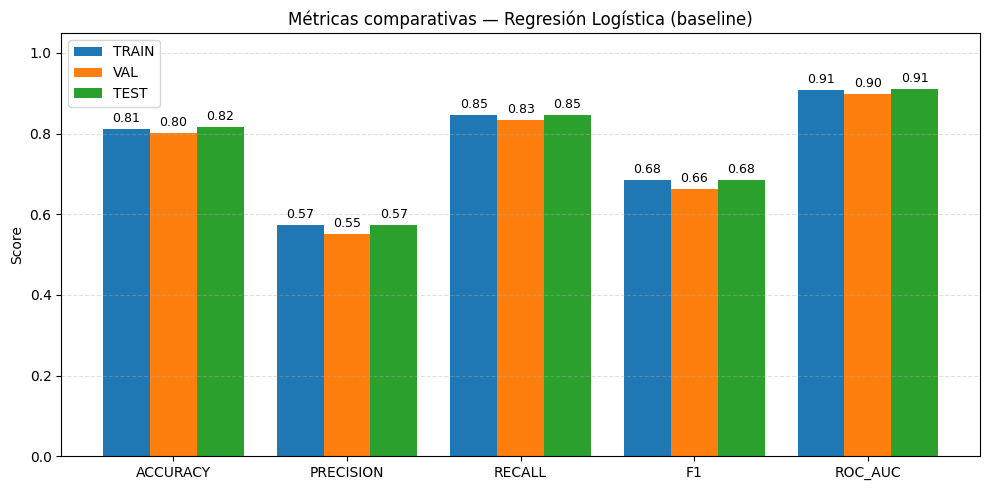

In [ ]:
# 2) Gráfico Métricas Comparativas
order = ["accuracy", "precision", "recall", "f1", "roc_auc"]
x = np.arange(len(order)); width = 0.27
plt.figure(figsize=(10,5))
b1 = plt.bar(x - width, metrics_df.loc["TRAIN", order].values, width, label="TRAIN")
b2 = plt.bar(x,         metrics_df.loc["VAL",   order].values, width, label="VAL")
b3 = plt.bar(x + width, metrics_df.loc["TEST",  order].values, width, label="TEST")
for bars in (b1,b2,b3):
    for b in bars:
        h = b.get_height()
        plt.text(b.get_x()+b.get_width()/2, h+0.01, f"{h:.2f}", ha="center", va="bottom", fontsize=9)
plt.xticks(x, [m.upper() for m in order])
plt.ylim(0, 1.05); plt.ylabel("Score")
plt.title("Métricas comparativas — Regresión Logística (baseline)")
plt.legend(); plt.grid(axis="y", linestyle="--", alpha=0.4); plt.tight_layout()
plt.savefig("/content/baseline_lr_metrics_grouped.png", dpi=150)
plt.show()

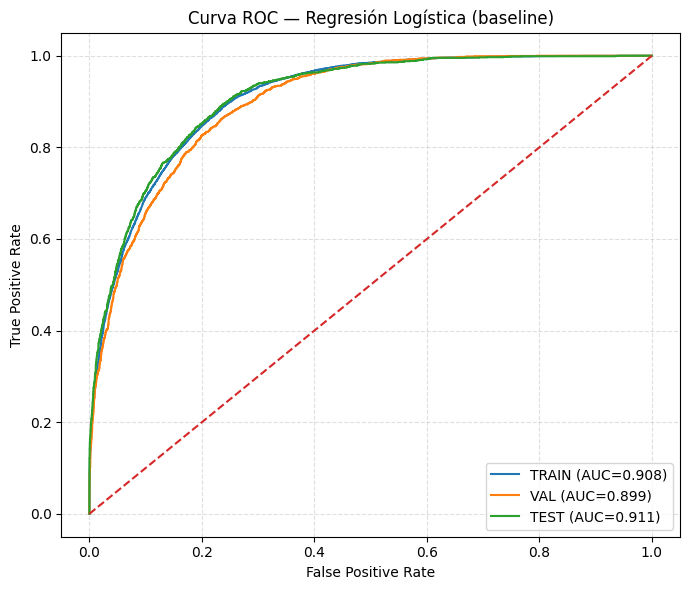

In [ ]:
# 3) Única figura con tres curvas ROC superpuestas
plt.figure(figsize=(7,6))
for name in ("TRAIN","VAL","TEST"):
    fpr, tpr, auc = *rocs[name][:2], rocs[name][2]
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Curva ROC — Regresión Logística (baseline)")
plt.legend(loc="lower right"); plt.grid(True, linestyle="--", alpha=0.4); plt.tight_layout()
plt.savefig("/content/baseline_lr_roc.png", dpi=150)
plt.show()

In [ ]:
# 4)  Matrices de confusión
for name in ("TRAIN","VAL","TEST"):
    df = pd.DataFrame(cms[name],
                      index=["<=50K (0) – Real", ">50K (1) – Real"],
                      columns=["Pred 0","Pred 1"])
    print(f"\nMatriz de confusión — {name}")
    display(df)

print("Guardados:")
print(" - /content/baseline_lr_metrics_grouped.png")
print(" - /content/baseline_lr_roc.png")


Matriz de confusión — TRAIN


,Pred 0,Pred 1
<=50K (0) – Real,19791,4929
>50K (1) – Real,1204,6637



Matriz de confusión — VAL


,Pred 0,Pred 1
<=50K (0) – Real,4912,1305
>50K (1) – Real,320,1603



Matriz de confusión — TEST


,Pred 0,Pred 1
<=50K (0) – Real,5011,1207
>50K (1) – Real,296,1627


Guardados:
 - /content/baseline_lr_metrics_grouped.png
 - /content/baseline_lr_roc.png


### RED NEURONAL ###

2.2.1 Arquitectura

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

def _as_np(a):
    return a.values if hasattr(a, "values") else np.asarray(a)

# Matrices de entrada (asegura float32)
X_train_np = _as_np(X_train_enc).astype("float32")
X_val_np   = _as_np(X_val_enc).astype("float32")
X_test_np  = _as_np(X_test_enc).astype("float32")

# Etiquetas (shape (n,1), float32)
y_train_np = _as_np(y_train_bin).reshape(-1, 1).astype("float32")
y_val_np   = _as_np(y_val_bin).reshape(-1, 1).astype("float32")
y_test_np  = _as_np(y_test_bin).reshape(-1, 1).astype("float32")

# Tensores
X_train_tensor = torch.tensor(X_train_np)
X_val_tensor   = torch.tensor(X_val_np)
X_test_tensor  = torch.tensor(X_test_np)

y_train_tensor = torch.tensor(y_train_np)
y_val_tensor   = torch.tensor(y_val_np)
y_test_tensor  = torch.tensor(y_test_np)

# Verificar si hay GPU disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Si hay GPU, mostrar información
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# --- Balanceo: pos_weight = n_neg / n_pos (calculado SOLO en train) ---
n_pos = float((y_train_bin == 1).sum())
n_neg = float((y_train_bin == 0).sum())
pos_weight = torch.tensor([n_neg / max(n_pos, 1.0)], dtype=torch.float32).to(device)

# DataLoaders
batch_size = 128
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_tensor,   y_val_tensor),   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(TensorDataset(X_test_tensor,  y_test_tensor),  batch_size=batch_size, shuffle=False)




Usando dispositivo: cuda
GPU: Tesla T4
Memoria GPU: 15.83 GB


In [ ]:
import torch.nn as nn

class ConfigurableMLP(nn.Module):
    """
    MLP configurable para clasificación binaria.
    - hidden: iterable con tamaños de capas ocultas, p.ej. [128, 64, 32]
    - dropout: float en [0,1]
    Salida: 1 logit (sin Sigmoid; se usa en la pérdida BCEWithLogitsLoss).
    """
    def __init__(self, input_size: int, hidden=(128, 64, 32), dropout: float = 0.10):
        super().__init__()
        layers = []
        in_f = input_size
        for h in hidden:
            layers += [nn.Linear(in_f, h), nn.ReLU()]
            if dropout > 0:
                layers += [nn.Dropout(dropout)]
            in_f = h
        layers += [nn.Linear(in_f, 1)]  # salida: 1 logit
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)  # logits

# Instanciación
input_size = X_train_tensor.shape[1]
model = ConfigurableMLP(input_size=input_size, hidden=(128, 64, 32), dropout=0.10).to(device)

2.2.2 Función de pérdida y el optimizador

In [ ]:
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

In [ ]:
print(torch.Tensor(X_train_scaled).shape)
print(torch.Tensor(y_train_scaled).shape)
torch.Tensor(X_val_scaled).shape
torch.Tensor(y_val_scaled).shape
torch.Tensor(X_test_scaled).shape
torch.Tensor(y_test_scaled).shape


torch.Size([32561, 91])
torch.Size([32561, 1])


torch.Size([8141, 1])

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# ======== Crear datasets directamente =========
train_dataset = TensorDataset(
    torch.tensor(X_train_scaled, dtype=torch.float32),
    torch.tensor(y_train_scaled, dtype=torch.float32)
)
val_dataset = TensorDataset(
    torch.tensor(X_val_scaled, dtype=torch.float32),
    torch.tensor(y_val_scaled, dtype=torch.float32)
)
test_dataset = TensorDataset(
    torch.tensor(X_test_scaled, dtype=torch.float32),
    torch.tensor(y_test_scaled, dtype=torch.float32)
)

# ======== DataLoaders (pin_memory para copias H2D más rápidas) ========
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)


# --- Balanceo: pos_weight = n_neg / n_pos (solo train) ---
n_pos = float((y_train_bin == 1).sum())
n_neg = float((y_train_bin == 0).sum())
pos_weight = torch.tensor([n_neg / max(n_pos, 1.0)], dtype=torch.float32, device=device)

# DataLoaders (opcional: pin_memory para copias H2D más rápidas)
batch_size = 128
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(TensorDataset(X_val_tensor,   y_val_tensor),   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(TensorDataset(X_test_tensor,  y_test_tensor),  batch_size=batch_size, shuffle=False, pin_memory=True)


In [ ]:
# Crear dataset de torch para hacer más sencillo la partición en batches
# para realizar el algoritmo mini-batch gradient descent
from torch.utils.data import TensorDataset, DataLoader

# Crear datasets
train_dataset = TensorDataset(torch.Tensor(X_train_scaled), torch.Tensor(y_train_scaled))
val_dataset = TensorDataset(torch.Tensor(X_val_scaled), torch.Tensor(y_val_scaled))
test_dataset = TensorDataset(torch.Tensor(X_test_scaled), torch.Tensor(y_test_scaled))

# Crear dataloaders, estos permiten hacer particiones y manipulaciones más sencillas sobre batches
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Antes del loop
model.to(device)
criterion = criterion.to(device)  # por si no lo hiciste antes

# Loop de entrenamiento en GPU

num_epochs = 100      # o el número que quieras probar
batch_size = 64

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_x, batch_y in train_loader:
        # mover a GPU
        batch_x = batch_x.to(device, non_blocking=True)
        batch_y = batch_y.to(device, non_blocking=True)

        predictions = model(batch_x)
        loss = criterion(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * batch_x.size(0)

    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            # mover a GPU
            batch_x = batch_x.to(device, non_blocking=True)
            batch_y = batch_y.to(device, non_blocking=True)

            predictions = model(batch_x)
            loss = criterion(predictions, batch_y)
            val_loss += loss.item() * batch_x.size(0)

    val_loss /= len(val_loader.dataset)
    print(f"Época {epoch+1}: train_loss={train_loss:.6f}, val_loss={val_loss:.6f}")

Época 1: train_loss=0.649316, val_loss=0.583935
Época 2: train_loss=0.568550, val_loss=0.580958
Época 3: train_loss=0.559471, val_loss=0.581321
Época 4: train_loss=0.555026, val_loss=0.579389
Época 5: train_loss=0.552132, val_loss=0.578753
Época 6: train_loss=0.547488, val_loss=0.583907
Época 7: train_loss=0.542914, val_loss=0.583665
Época 8: train_loss=0.539599, val_loss=0.578718
Época 9: train_loss=0.538583, val_loss=0.582012
Época 10: train_loss=0.536249, val_loss=0.580073
Época 11: train_loss=0.532928, val_loss=0.583817
Época 12: train_loss=0.529693, val_loss=0.589635
Época 13: train_loss=0.526989, val_loss=0.582607
Época 14: train_loss=0.525611, val_loss=0.590132
Época 15: train_loss=0.524061, val_loss=0.591886
Época 16: train_loss=0.520635, val_loss=0.590551
Época 17: train_loss=0.517503, val_loss=0.591496
Época 18: train_loss=0.517009, val_loss=0.595103
Época 19: train_loss=0.512512, val_loss=0.598914
Época 20: train_loss=0.511209, val_loss=0.606861
Época 21: train_loss=0.509763

2.2.3 Loop de entrenamiento que incluya la validación

In [ ]:
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader

# ======== Configuración de dispositivo ========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo ========
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_neurons))
        layers.append(nn.ReLU())
        for i in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_neurons, output_size))
        layers.append(nn.Sigmoid())  # salida entre 0 y 1
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros ========
hidden_layers = 4
hidden_neurons = 256
learning_rate = 0.001
batch_size = 64
num_epochs = 100

# ======== Instanciar modelo y optimizador ========
model = MLP(input_size=91,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1).to(device)

criterion = nn.BCELoss().to(device)  # función de pérdida binaria
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# ======== Datasets y DataLoaders ========
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_scaled, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_scaled, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_scaled, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento ========
# antes del loop:
train_losses, val_losses = [], []   # <-- NUEVO

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device, non_blocking=True)
        batch_y = batch_y.to(device, non_blocking=True)

        predictions = model(batch_x)
        loss = criterion(predictions, batch_y.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_x.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.to(device, non_blocking=True)
            batch_y = batch_y.to(device, non_blocking=True)

            predictions = model(batch_x)
            loss = criterion(predictions, batch_y.view(-1, 1))
            val_loss += loss.item() * batch_x.size(0)
    val_loss /= len(val_loader.dataset)

# <-- NUEVO: guardar pérdidas por época
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Solo imprimir cada 10 épocas
    if (epoch + 1) % 10 == 0:
        print(f"Época {epoch+1}: train_loss={train_loss:.6f}, val_loss={val_loss:.6f}")


Usando dispositivo: cuda
GPU: Tesla T4
Memoria GPU: 15.83 GB
Época 10: train_loss=0.273536, val_loss=0.334252
Época 20: train_loss=0.238587, val_loss=0.474418
Época 30: train_loss=0.218252, val_loss=0.539367
Época 40: train_loss=0.223315, val_loss=0.751976
Época 50: train_loss=0.185793, val_loss=0.744305
Época 60: train_loss=0.172891, val_loss=0.947615
Época 70: train_loss=0.167627, val_loss=0.957530
Época 80: train_loss=0.161718, val_loss=1.089594
Época 90: train_loss=0.153796, val_loss=1.119987
Época 100: train_loss=0.152128, val_loss=1.202338



=== RESUMEN ===
 TRAIN: acc=0.9310 | prec=0.8525 | rec=0.8629 | f1=0.8576 | auc=0.9820
 VAL: acc=0.8291 | prec=0.6391 | rec=0.6355 | f1=0.6373 | auc=0.8710
 TEST: acc=0.8387 | prec=0.6574 | rec=0.6625 | f1=0.6599 | auc=0.8837

Loss finales -> train: 0.14606 | val: 1.20234
Diagnóstico: posible OVERFITTING (train_loss bajo y val_loss mayor)


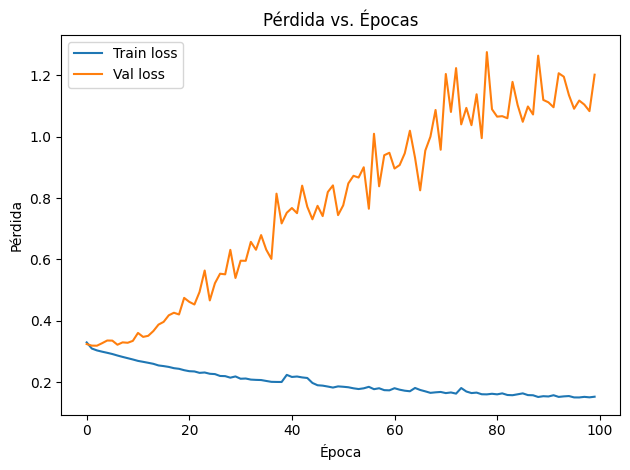

Gráfica de pérdida guardada en: loss_curve.png


In [ ]:
# ==== MÉTRICAS FINALES + PÉRDIDAS + GRÁFICA ÚNICA (para el modelo actual) ====
import torch, numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
import matplotlib.pyplot as plt

# --- helpers ---
@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        out = model(xb)  # (B,1)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total = 0.0
    n = 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)  # ya es prob si tu red termina en Sigmoid
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

# --- ejecutar (ajusta 'device' si usas otro) ---
# Tu modelo ya entrenado debe estar en 'model', tus loaders en train_loader/val_loader/test_loader
# y tu criterio en 'criterion'. La red termina con Sigmoid -> outputs_are_probs=True
final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

# --- diagnóstico breve over/under ---
_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

# --- resumen compacto ---
print("\n=== RESUMEN ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")

import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_losses, label="Train loss")
plt.plot(val_losses,   label="Val loss")
plt.xlabel("Época"); plt.ylabel("Pérdida"); plt.title("Pérdida vs. Épocas")
plt.legend(); plt.tight_layout()
plt.savefig("loss_curve.png", dpi=150)
plt.show()
print("Gráfica de pérdida guardada en: loss_curve.png")

2.2.4 Configuraciones de Hiperparámetros

Experimento 1

In [ ]:
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader

# ======== Configuración de dispositivo ========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo ========
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_neurons))
        layers.append(nn.ReLU())
        for i in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_neurons, output_size))
        layers.append(nn.Sigmoid())  # salida entre 0 y 1
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXPERIMENTO más grande, sin regularización) ========
hidden_layers = 6          # ↑ más capas
hidden_neurons = 512       # ↑ más neuronas
learning_rate = 0.001
batch_size = 128           # opcionalmente mayor para GPU
num_epochs = 100

# ======== Instanciar modelo y optimizador ========
model = MLP(input_size=91,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1).to(device)

criterion = nn.BCELoss().to(device)  # función de pérdida binaria (sin regularización)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # sin weight_decay

# ======== Datasets y DataLoaders ========
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_scaled, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_scaled, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_scaled, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento ========
train_losses, val_losses = [], []   # <-- mantener registro por época

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device, non_blocking=True)
        batch_y = batch_y.to(device, non_blocking=True)

        predictions = model(batch_x)
        loss = criterion(predictions, batch_y.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_x.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.to(device, non_blocking=True)
            batch_y = batch_y.to(device, non_blocking=True)

            predictions = model(batch_x)
            loss = criterion(predictions, batch_y.view(-1, 1))
            val_loss += loss.item() * batch_x.size(0)
    val_loss /= len(val_loader.dataset)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Solo imprimir cada 10 épocas
    if (epoch + 1) % 10 == 0:
        print(f"Época {epoch+1}: train_loss={train_loss:.6f}, val_loss={val_loss:.6f}")

# ======== MÉTRICAS FINALES ========
import torch, numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        out = model(xb)  # (B,1)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total = 0.0
    n = 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)  # ya es prob si la red termina en Sigmoid
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")


Usando dispositivo: cpu
Época 10: train_loss=0.277338, val_loss=0.359007
Época 20: train_loss=0.238552, val_loss=0.475485
Época 30: train_loss=0.209333, val_loss=0.722557
Época 40: train_loss=0.190659, val_loss=0.879343
Época 50: train_loss=0.175637, val_loss=1.176966
Época 60: train_loss=0.163950, val_loss=1.293352
Época 70: train_loss=0.158772, val_loss=1.260965
Época 80: train_loss=0.146471, val_loss=1.378066
Época 90: train_loss=0.141347, val_loss=1.623195
Época 100: train_loss=0.143673, val_loss=1.289881


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



=== RESUMEN ===
 TRAIN: acc=0.9416 | prec=0.8875 | rec=0.8675 | f1=0.8774 | auc=0.9868
 VAL: acc=0.8289 | prec=0.6437 | rec=0.6173 | f1=0.6302 | auc=0.8666
 TEST: acc=0.8343 | prec=0.6509 | rec=0.6438 | f1=0.6473 | auc=0.8747

Loss finales -> train: 0.13006 | val: 1.28988
Diagnóstico: posible OVERFITTING (train_loss bajo y val_loss mayor)


In [ ]:
# 4: guardar resultados
experiment_result = {
    "name": "EXP1_sin_reg_big",
    "train_losses": train_losses,
    "val_losses": val_losses,
    "metrics": metrics,
}
try:
    experiments.append(experiment_result)
except NameError:
    experiments = [experiment_result]

print("Resultados guardados en 'experiments'. Total acumulados:", len(experiments))

Resultados guardados en 'experiments'. Total acumulados: 1


Experimento 2

In [ ]:
# ======== Configuración de dispositivo ========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo ========
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_neurons))
        layers.append(nn.ReLU())
        for i in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_neurons, output_size))
        layers.append(nn.Sigmoid())  # salida entre 0 y 1
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXPERIMENTO 2: reducir capacidad, sin regularización) ========
hidden_layers = 3          # ↓ menos capas para reducir sobreajuste
hidden_neurons = 192       # ↓ menos neuronas
learning_rate = 0.0007     # ↓ LR más suave
batch_size = 64            # mantener tamaño moderado
num_epochs = 150           # aún generoso pero menor que el exp. grande

# ======== Instanciar modelo y optimizador ========
model = MLP(input_size=91,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1).to(device)

criterion = nn.BCELoss().to(device)  # sin regularización explícita
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # sin weight_decay

# ======== Datasets y DataLoaders ========
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_scaled, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_scaled, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_scaled, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento ========
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device, non_blocking=True)
        batch_y = batch_y.to(device, non_blocking=True)

        predictions = model(batch_x)
        loss = criterion(predictions, batch_y.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_x.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.to(device, non_blocking=True)
            batch_y = batch_y.to(device, non_blocking=True)

            predictions = model(batch_x)
            loss = criterion(predictions, batch_y.view(-1, 1))
            val_loss += loss.item() * batch_x.size(0)
    val_loss /= len(val_loader.dataset)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Época {epoch+1}: train_loss={train_loss:.6f}, val_loss={val_loss:.6f}")

# ======== MÉTRICAS FINALES ========
import torch, numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        out = model(xb)  # (B,1)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total = 0.0
    n = 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)  # ya es prob si la red termina en Sigmoid
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")




Usando dispositivo: cuda
GPU: Tesla T4
Memoria GPU: 15.83 GB
Época 10: train_loss=0.275965, val_loss=0.328793
Época 20: train_loss=0.243180, val_loss=0.414766
Época 30: train_loss=0.215769, val_loss=0.556381
Época 40: train_loss=0.197920, val_loss=0.687258
Época 50: train_loss=0.190968, val_loss=0.865210
Época 60: train_loss=0.184188, val_loss=0.938224
Época 70: train_loss=0.173899, val_loss=1.099909
Época 80: train_loss=0.163994, val_loss=1.121225
Época 90: train_loss=0.163689, val_loss=1.291793
Época 100: train_loss=0.150105, val_loss=1.301691
Época 110: train_loss=0.167711, val_loss=1.451111
Época 120: train_loss=0.144351, val_loss=1.524604
Época 130: train_loss=0.142547, val_loss=1.604407
Época 140: train_loss=0.145482, val_loss=1.590634
Época 150: train_loss=0.140435, val_loss=1.513217

=== RESUMEN ===
 TRAIN: acc=0.9421 | prec=0.8794 | rec=0.8801 | f1=0.8798 | auc=0.9864
 VAL: acc=0.8301 | prec=0.6438 | rec=0.6287 | f1=0.6361 | auc=0.8703
 TEST: acc=0.8349 | prec=0.6512 | rec=0.6

In [ ]:
# ======== Guardar resultados del experimento ========
experiment_result = {
    "name": "EXP2_capacidad_media_sin_reg",  # cambia el nombre según el experimento
    "train_losses": train_losses,            # lista de pérdidas por época
    "val_losses": val_losses,                # lista de pérdidas por época
    "metrics": metrics,                      # dict con acc, prec, rec, f1, auc + losses finales
}

# Acumular en lista global
try:
    experiments.append(experiment_result)
except NameError:
    experiments = [experiment_result]

print(f"Resultados guardados en 'experiments'. Total acumulados: {len(experiments)}")


Resultados guardados en 'experiments'. Total acumulados: 2


Experimento 3

In [ ]:
# ======== Configuración de dispositivo ========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo ========
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_neurons))
        layers.append(nn.ReLU())
        for i in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_neurons, output_size))
        layers.append(nn.Sigmoid())  # salida entre 0 y 1
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXPERIMENTO 3: menos capacidad y paso más suave, sin regularización) ========
hidden_layers = 2          # ↓ menos capas que exp. previos
hidden_neurons = 160       # ↓ menos neuronas por capa
learning_rate = 0.0006     # ↓ LR para actualizar más fino
batch_size = 128           # batch mayor ayuda a estabilizar (sin reg explícita)
num_epochs = 140           # aún generoso, pero algo menor para limitar sobreajuste

# ======== Instanciar modelo y optimizador ========
model = MLP(input_size=91,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1).to(device)

criterion = nn.BCELoss().to(device)  # sin regularización
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # sin weight_decay

# ======== Datasets y DataLoaders ========
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_scaled, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_scaled, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_scaled, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento ========
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device, non_blocking=True)
        batch_y = batch_y.to(device, non_blocking=True)

        predictions = model(batch_x)
        loss = criterion(predictions, batch_y.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_x.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.to(device, non_blocking=True)
            batch_y = batch_y.to(device, non_blocking=True)

            predictions = model(batch_x)
            loss = criterion(predictions, batch_y.view(-1, 1))
            val_loss += loss.item() * batch_x.size(0)
    val_loss /= len(val_loader.dataset)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Época {epoch+1}: train_loss={train_loss:.6f}, val_loss={val_loss:.6f}")

# ======== MÉTRICAS FINALES ========
import torch, numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        out = model(xb)  # (B,1)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total = 0.0
    n = 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)  # ya es prob si la red termina en Sigmoid
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")



Usando dispositivo: cuda
GPU: Tesla T4
Memoria GPU: 15.83 GB
Época 10: train_loss=0.291877, val_loss=0.320739
Época 20: train_loss=0.276608, val_loss=0.339507
Época 30: train_loss=0.262243, val_loss=0.354763
Época 40: train_loss=0.249561, val_loss=0.373052
Época 50: train_loss=0.239332, val_loss=0.393217
Época 60: train_loss=0.228971, val_loss=0.408935
Época 70: train_loss=0.222225, val_loss=0.430140
Época 80: train_loss=0.213686, val_loss=0.448461
Época 90: train_loss=0.208691, val_loss=0.482576
Época 100: train_loss=0.205474, val_loss=0.497033
Época 110: train_loss=0.199608, val_loss=0.542626
Época 120: train_loss=0.195666, val_loss=0.544174
Época 130: train_loss=0.192263, val_loss=0.553450


In [ ]:
# ======== Guardar resultados del experimento 3 ========
experiment_result = {
    "name": "EXP3_capacidad_baja_sin_reg",
    "train_losses": train_losses,
    "val_losses": val_losses,
    "metrics": metrics,
}
try:
    experiments.append(experiment_result)
except NameError:
    experiments = [experiment_result]

print("Resultados guardados en 'experiments'. Total acumulados:", len(experiments))

Experimento 4

In [ ]:
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader

# ======== Configuración de dispositivo ========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo ========
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_neurons))
        layers.append(nn.ReLU())
        for i in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_neurons, output_size))
        layers.append(nn.Sigmoid())  # salida entre 0 y 1
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXPERIMENTO 4: reducir sobreajuste sin regularización) ========
hidden_layers = 2          # mantener red compacta
hidden_neurons = 128       # ↓ capacidad por capa
learning_rate = 0.0005     # paso más suave
batch_size = 256           # batch grande estabiliza actualizaciones
num_epochs = 120           # aún generoso pero limita sobreajuste tardío

# ======== Instanciar modelo y optimizador ========
model = MLP(input_size=91,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1).to(device)

criterion = nn.BCELoss().to(device)  # sin regularización explícita
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # sin weight_decay

# ======== Datasets y DataLoaders ========
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_scaled, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_scaled, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_scaled, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento ========
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device, non_blocking=True)
        batch_y = batch_y.to(device, non_blocking=True)

        predictions = model(batch_x)
        loss = criterion(predictions, batch_y.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_x.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.to(device, non_blocking=True)
            batch_y = batch_y.to(device, non_blocking=True)

            predictions = model(batch_x)
            loss = criterion(predictions, batch_y.view(-1, 1))
            val_loss += loss.item() * batch_x.size(0)
    val_loss /= len(val_loader.dataset)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Época {epoch+1}: train_loss={train_loss:.6f}, val_loss={val_loss:.6f}")

# ======== MÉTRICAS FINALES ========
import torch, numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        out = model(xb)  # (B,1)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total = 0.0
    n = 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)  # ya es prob si la red termina en Sigmoid
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")

In [ ]:
# ======== Guardar resultados del experimento 4 ========
experiment_result = {
    "name": "EXP4_capacidad_compacta_batch_grande_sin_reg",
    "train_losses": train_losses,
    "val_losses": val_losses,
    "metrics": metrics,
}
try:
    experiments.append(experiment_result)
except NameError:
    experiments = [experiment_result]

print("Resultados guardados en 'experiments'. Total acumulados:", len(experiments))


Experimento 5

In [ ]:
# ======== Configuración de dispositivo ========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo ========
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_neurons))
        layers.append(nn.ReLU())
        for i in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_neurons, output_size))
        layers.append(nn.Sigmoid())  # salida entre 0 y 1
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXPERIMENTO 5: red aún más simple, sin regularización) ========
hidden_layers = 1          # 1 sola capa oculta
hidden_neurons = 96        # menos neuronas para bajar capacidad
learning_rate = 0.0005     # paso moderado
batch_size = 256           # batch grande estabiliza actualizaciones
num_epochs = 120           # generoso pero acotado

# ======== Instanciar modelo y optimizador ========
model = MLP(input_size=91,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1).to(device)

criterion = nn.BCELoss().to(device)  # sin regularización explícita
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # sin weight_decay

# ======== Datasets y DataLoaders ========
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_scaled, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_scaled, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_scaled, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento ========
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device, non_blocking=True)
        batch_y = batch_y.to(device, non_blocking=True)

        predictions = model(batch_x)
        loss = criterion(predictions, batch_y.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_x.size(0)
    train_loss /= len(train_loader.dataset)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            batch_x = batch_x.to(device, non_blocking=True)
            batch_y = batch_y.to(device, non_blocking=True)

            predictions = model(batch_x)
            loss = criterion(predictions, batch_y.view(-1, 1))
            val_loss += loss.item() * batch_x.size(0)
    val_loss /= len(val_loader.dataset)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Época {epoch+1}: train_loss={train_loss:.6f}, val_loss={val_loss:.6f}")

# ======== MÉTRICAS FINALES ========
import torch, numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        out = model(xb)  # (B,1)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total = 0.0
    n = 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)  # ya es prob si la red termina en Sigmoid
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")


In [ ]:
# ======== Guardar resultados del experimento 5 ========
experiment_result = {
    "name": "EXP5_capacidad_minima_batch_grande_sin_reg",
    "train_losses": train_losses,
    "val_losses": val_losses,
    "metrics": metrics,
}
try:
    experiments.append(experiment_result)
except NameError:
    experiments = [experiment_result]

print("Resultados guardados en 'experiments'. Total acumulados:", len(experiments))

In [ ]:
# === Gráficas unificadas de 5 experimentos ===
import matplotlib.pyplot as plt

# Asegúrate de tener 5 experimentos guardados en 'experiments'
assert 'experiments' in globals() and len(experiments) >= 5, "Se requieren al menos 5 experimentos en 'experiments'."
exps5 = experiments[:5]
names = [e["name"] for e in exps5]

# --- 1) Pérdida — Train vs Val (5 experimentos superpuestos) ---
plt.figure()
for e in exps5:
    plt.plot(e["train_losses"], label=f"{e['name']} — train")
    plt.plot(e["val_losses"],   label=f"{e['name']} — val", linestyle="--")
plt.xlabel("Época"); plt.ylabel("BCELoss"); plt.title("Pérdida — Train vs Val (Exp Sin Regularización)")
plt.legend(); plt.tight_layout(); plt.show()

# --- 2) Evolución de F1 — Val (si existe historial por época) ---
tiene_f1_hist = all(("val_f1_hist" in e and isinstance(e["val_f1_hist"], (list, tuple)) and len(e["val_f1_hist"])>0) for e in exps5)
if tiene_f1_hist:
    plt.figure()
    for e in exps5:
        plt.plot(e["val_f1_hist"], label=f"{e['name']} — F1 (val)")
    plt.xlabel("Época"); plt.ylabel("F1 (validación)"); plt.title("Evolución de F1 — Val (Exp Sin Regularización)")
    plt.legend(); plt.tight_layout(); plt.show()
else:
    print("Aviso: no se encontró 'val_f1_hist' por época en los 5 experimentos. "
          "Si quieres esta gráfica, guarda el historial de F1 por época como e['val_f1_hist'].")

# --- 3) Comparativa de métricas finales en Validación (ACC, F1, AUC) ---
vals_acc = [e["metrics"]["val"]["accuracy"] for e in exps5]
vals_f1  = [e["metrics"]["val"]["f1"]       for e in exps5]
vals_auc = [e["metrics"]["val"]["roc_auc"]  for e in exps5]

x = np.arange(len(exps5))
w = 0.25
plt.figure()
plt.bar(x - w, vals_acc, width=w, label="ACC (val)")
plt.bar(x,       vals_f1, width=w, label="F1  (val)")
plt.bar(x + w, vals_auc, width=w, label="AUC (val)")
plt.xticks(x, names, rotation=15)
plt.ylabel("Score"); plt.title("Comparativa de métricas finales — Validación (Exp Sin Regularización)")
plt.legend(); plt.tight_layout(); plt.show()

# --- 4) (Opcional) Solo Val Loss para lectura clara ---
plt.figure()
for e in exps5:
    plt.plot(e["val_losses"], label=f"{e['name']}")
plt.xlabel("Época"); plt.ylabel("BCELoss"); plt.title("Val Loss — Exp Sin Regularización")
plt.legend(); plt.tight_layout(); plt.show()



In [ ]:
# === Seleccionar los primeros 5 experimentos ===
import numpy as np

assert "experiments" in globals() and len(experiments) >= 5, \
       "Debes tener al menos 5 experimentos guardados en 'experiments'."

exps_first5 = experiments[:5]           # primeros 5
names_first = [e["name"] for e in exps_first5]

# --- Comparativa de métricas finales (ACC, F1, AUC en Validación) ---
vals_acc_first = [e["metrics"]["val"]["accuracy"] for e in exps_first5]
vals_f1_first  = [e["metrics"]["val"]["f1"]       for e in exps_first5]
vals_auc_first = [e["metrics"]["val"]["roc_auc"]  for e in exps_first5]

# --- Reportar el mejor por F1 en validación ---
best_idx_first = int(np.argmax(vals_f1_first))
best_exp_first = exps_first5[best_idx_first]

print(f"\n>>> Mejor de los PRIMEROS 5 (por F1 val): {best_exp_first['name']} con F1={vals_f1_first[best_idx_first]:.4f}")
print("Métricas VALID:", best_exp_first["metrics"]["val"])
print("Métricas TEST :", best_exp_first["metrics"]["test"])


2.2.5. Investigue en internet e implemente las siguientes técnicas: Dropout y EarlyStopping. Pista:
Dropout se implementa dentro de la arquitectura base de la red. EarlyStopping se usa dentro
del loop de entrenamiento

In [ ]:
#Arquitectura MLP con Dropout
import torch
from torch import nn

class MLP(nn.Module):
    def __init__(self, in_dim, hidden=[256,128], pdrop=0.3):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden:
            layers += [nn.Linear(prev, h), nn.ReLU(), nn.Dropout(pdrop)]
            prev = h
        layers += [nn.Linear(prev, 1), nn.Sigmoid()]  # salida binaria
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)


In [ ]:
#EarlyStopping (sencillo) dentro del loop
class EarlyStopper:
    def __init__(self, patience=10, min_delta=1e-4):  # min_delta = mejora mínima requerida
        self.patience = patience
        self.min_delta = min_delta
        self.best = None
        self.bad_count = 0

    def step(self, current):
        if self.best is None or current < self.best - self.min_delta:
            self.best = current
            self.bad_count = 0
            return False  # no parar
        else:
            self.bad_count += 1
            return self.bad_count >= self.patience


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score
import torch
import numpy as np
import matplotlib.pyplot as plt

# === DataLoaders con TUS tensores ya creados ===
train_ld = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=1024, shuffle=True)
val_ld   = DataLoader(TensorDataset(X_val_tensor,   y_val_tensor),   batch_size=2048, shuffle=False)

# === Dispositivo ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

# === Modelo + pérdida + optimizador ===
in_dim = X_train_tensor.shape[1]
model = MLP(in_dim=in_dim, hidden=[256, 128], pdrop=0.5).to(device)  # Dropout

criterion = nn.BCELoss()             # salida con Sigmoid en el MLP
learning_rate = 1e-3
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# --- EarlyStopping por F1 (MAXIMIZAR) ---
class EarlyStopperMax:
    def __init__(self, patience=15, min_delta=1e-4):
        self.patience = patience
        self.min_delta = min_delta
        self.best = None
        self.bad = 0
    def step(self, current):
        if self.best is None or current > self.best + self.min_delta:
            self.best = current
            self.bad = 0
            return False  # no parar
        else:
            self.bad += 1
            return self.bad >= self.patience

es = EarlyStopperMax(patience=15, min_delta=1e-4)

# para restaurar el mejor modelo según F1(val)
best_state = None
best_val_f1 = -1.0

# === Entrenamiento ===
epochs = 200
train_losses, val_losses, val_f1_hist = [], [], []

for epoch in range(1, epochs + 1):
    # ---- TRAIN ----
    model.train()
    tot = 0.0
    for xb, yb in train_ld:
        xb = xb.to(device)
        yb = yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        tot += loss.item() * xb.size(0)
    train_loss = tot / len(train_ld.dataset)

    # ---- VALID ----
    model.eval()
    vtot = 0.0
    probs, ys = [], []
    with torch.no_grad():
        for xb, yb in val_ld:
            xb, yb = xb.to(device), yb.to(device)
            p = model(xb)                  # p en [0,1] por Sigmoid
            vloss = criterion(p, yb)
            vtot += vloss.item() * xb.size(0)
            probs.append(p.detach().cpu().numpy())
            ys.append(yb.detach().cpu().numpy())
    val_loss = vtot / len(val_ld.dataset)
    P = np.vstack(probs)
    Y = np.vstack(ys)
    val_f1 = f1_score(Y, (P >= 0.5).astype(int), zero_division=0)

    # logs
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_f1_hist.append(val_f1)

    if epoch == 1 or epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | train_loss={train_loss:.4f} | val_loss={val_loss:.4f} | val_F1={val_f1:.4f}")

    # guardar mejor estado por F1(val)
    if val_f1 > best_val_f1 + 1e-4:
        best_val_f1 = val_f1
        best_state = {k: v.clone() for k, v in model.state_dict().items()}

    # ---- EarlyStopping por F1 (mayor es mejor) ----
    if es.step(val_f1):
        print(f"Early stopping (F1) en epoch {epoch}")
        break

# restaurar el mejor estado (según F1 de validación)
if best_state is not None:
    model.load_state_dict(best_state)

# === Gráficas ===
plt.figure()
plt.plot(train_losses, label="train_loss")
plt.plot(val_losses,   label="val_loss")
plt.xlabel("Época"); plt.ylabel("BCELoss"); plt.title("Pérdida — Train vs Val"); plt.legend(); plt.show()

plt.figure()
plt.plot(val_f1_hist, label="val_F1")
plt.xlabel("Época"); plt.ylabel("F1 (validación)"); plt.title("Evolución de F1 — Val"); plt.legend(); plt.show()



In [ ]:
best_state = None
best_val = float("inf")  # si monitoreas val_loss

for epoch in range(1, epochs + 1):
    # ... tu fase TRAIN igual ...

    # ---- VALID ----
    model.eval()
    vtot = 0.0
    with torch.no_grad():
        for xb, yb in val_ld:
            xb, yb = xb.to(device), yb.to(device)
            p = model(xb)
            vloss = criterion(p, yb)
            vtot += vloss.item() * xb.size(0)
    val_loss = vtot / len(val_ld.dataset)

    # guarda mejor
    if val_loss < best_val - 1e-4:
        best_val = val_loss
        best_state = {k: v.clone() for k, v in model.state_dict().items()}

    # ... tu early stopping:
    if es.step(val_loss):
        print(f"Early stopping en epoch {epoch}")
        break

# restaurar mejor
if best_state is not None:
    model.load_state_dict(best_state)


2.2.6. Vuelva a realizar (4) y obtenga el mejor MLP con regularización.

Experimento 1-Con Regularización

In [ ]:
# ======== Configuración de dispositivo ========
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo con REGULARIZACIÓN (R1) ========
# Dropout(p=0.1) en todas las capas ocultas
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size, pdrop=0.1):
        super().__init__()
        layers = []
        # primera capa
        layers += [nn.Linear(input_size, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        # capas ocultas intermedias
        for _ in range(hidden_layers - 1):
            layers += [nn.Linear(hidden_neurons, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        # salida
        layers += [nn.Linear(hidden_neurons, output_size), nn.Sigmoid()]  # prob binaria
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXPERIMENTO 1 CON REG) ========
hidden_layers  = 6
hidden_neurons = 512
learning_rate  = 1e-3
batch_size     = 128
num_epochs     = 100
pdrop          = 0.1     # R1
weight_decay   = 1e-4    # R1

# ======== Instanciar modelo y optimizador ========
input_size = X_train_scaled.shape[1]   # evita hardcodear (antes ponías 91)
model = MLP(input_size=input_size,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1,
            pdrop=pdrop).to(device)

criterion = nn.BCELoss().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# ======== Datasets y DataLoaders ========
# ⚠️ Usa y_* BINARIO (0/1). Si tienes y_*_bin, usa eso:
# y_train_used, y_val_used, y_test_used = y_train_bin, y_val_bin, y_test_bin
# Si no, mantén y_*_scaled SOLO si está en [0,1].
y_train_used, y_val_used, y_test_used = y_train_scaled, y_val_scaled, y_test_scaled

train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_used, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_used, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_used, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento (con registro de pérdidas) ========
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # --- Train ---
    model.train()
    total = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb.view(-1,1))
        loss.backward()
        optimizer.step()
        total += loss.item() * xb.size(0)
    train_loss = total / len(train_loader.dataset)

    # --- Val ---
    model.eval()
    vtotal = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
            pred = model(xb)
            vloss = criterion(pred, yb.view(-1,1))
            vtotal += vloss.item() * xb.size(0)
    val_loss = vtotal / len(val_loader.dataset)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Época {epoch+1:03d} | train_loss={train_loss:.6f} | val_loss={val_loss:.6f}")

# ======== Métricas finales ========
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        out = model(xb)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total, n = 0.0, 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN EXP1_CON_REG_R1 ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")


In [ ]:
# Guardar resultados para comparar luego
exp_result_R1 = {
    "name": "EXP1_con_reg_R1(p=0.1,wd=1e-4)",
    "train_losses": train_losses,
    "val_losses": val_losses,
    "metrics": metrics,
}
try:
    experiments.append(exp_result_R1)
except NameError:
    experiments = [exp_result_R1]

print("Resultados guardados en 'experiments'. Total acumulados:", len(experiments))


Experimento 2-Con Regularización

In [ ]:
# ======== Configuración de dispositivo ========
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo (CON REGULARIZACIÓN R2) ========
# Dropout(p=0.2) en todas las capas ocultas
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size, pdrop=0.2):
        super().__init__()
        layers = []
        layers += [nn.Linear(input_size, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        for _ in range(hidden_layers - 1):
            layers += [nn.Linear(hidden_neurons, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        layers += [nn.Linear(hidden_neurons, output_size), nn.Sigmoid()]  # prob binaria
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXP 2 con REG R2) ========
hidden_layers  = 3
hidden_neurons = 192
learning_rate  = 7e-4
batch_size     = 64
num_epochs     = 150
pdrop          = 0.2      # R2
weight_decay   = 5e-4     # R2

# ======== Instanciar modelo y optimizador ========
input_size = X_train_scaled.shape[1]   # evita hardcodear 91
model = MLP(input_size=input_size,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1,
            pdrop=pdrop).to(device)

criterion = nn.BCELoss().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# ======== Datasets y DataLoaders ========
# Usa tus y_* binarios o escalados en [0,1]
y_train_used, y_val_used, y_test_used = y_train_scaled, y_val_scaled, y_test_scaled

train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_used, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_used, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_used, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento ========
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # --- train ---
    model.train()
    total = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb.view(-1,1))
        loss.backward()
        optimizer.step()
        total += loss.item() * xb.size(0)
    train_loss = total / len(train_loader.dataset)

    # --- val ---
    model.eval()
    vtotal = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
            pred = model(xb)
            vloss = criterion(pred, yb.view(-1,1))
            vtotal += vloss.item() * xb.size(0)
    val_loss = vtotal / len(val_loader.dataset)

    train_losses.append(train_loss); val_losses.append(val_loss)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Época {epoch+1:03d} | train_loss={train_loss:.6f} | val_loss={val_loss:.6f}")

# ======== Métricas finales ========
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        out = model(xb)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total, n = 0.0, 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN EXP2_CON_REG_R2 ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")



In [ ]:
# Guardar resultados
exp_result_R2 = {
    "name": "EXP2_con_reg_R2(p=0.2,wd=5e-4)",
    "train_losses": train_losses,
    "val_losses": val_losses,
    "metrics": metrics,
}
try:
    experiments.append(exp_result_R2)
except NameError:
    experiments = [exp_result_R2]

print("Resultados guardados en 'experiments'. Total acumulados:", len(experiments))

Experimento 3-Con Regularización

In [ ]:
# ======== Configuración de dispositivo ========
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo (CON REGULARIZACIÓN R3) ========
# Dropout(p=0.3) en todas las capas ocultas
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size, pdrop=0.3):
        super().__init__()
        layers = []
        layers += [nn.Linear(input_size, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        for _ in range(hidden_layers - 1):
            layers += [nn.Linear(hidden_neurons, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        layers += [nn.Linear(hidden_neurons, output_size), nn.Sigmoid()]  # prob binaria
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXP 3 con REG R3) ========
hidden_layers  = 2
hidden_neurons = 160
learning_rate  = 6e-4
batch_size     = 128
num_epochs     = 140
pdrop          = 0.3      # R3
weight_decay   = 1e-3     # R3

# ======== Instanciar modelo y optimizador ========
input_size = X_train_scaled.shape[1]   # evita hardcodear
model = MLP(input_size=input_size,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1,
            pdrop=pdrop).to(device)

criterion = nn.BCELoss().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# ======== Datasets y DataLoaders ========
# Usa tus y_* binarios (0/1) o escalados en [0,1]
y_train_used, y_val_used, y_test_used = y_train_scaled, y_val_scaled, y_test_scaled

train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_used, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_used, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_used, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento ========
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # --- train ---
    model.train()
    total = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb.view(-1,1))
        loss.backward()
        optimizer.step()
        total += loss.item() * xb.size(0)
    train_loss = total / len(train_loader.dataset)

    # --- val ---
    model.eval()
    vtotal = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
            pred = model(xb)
            vloss = criterion(pred, yb.view(-1,1))
            vtotal += vloss.item() * xb.size(0)
    val_loss = vtotal / len(val_loader.dataset)

    train_losses.append(train_loss); val_losses.append(val_loss)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Época {epoch+1:03d} | train_loss={train_loss:.6f} | val_loss={val_loss:.6f}")

# ======== Métricas finales ========
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)
        out = model(xb)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total, n = 0.0, 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN EXP3_CON_REG_R3 ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")



In [ ]:
# ======== Guardar resultados del experimento 3 ========
exp_result_R3 = {
    "name": "EXP3_con_reg_R3(p=0.3,wd=1e-3)",
    "train_losses": train_losses,
    "val_losses": val_losses,
    "metrics": metrics,
}
try:
    experiments.append(exp_result_R3)
except NameError:
    experiments = [exp_result_R3]

print("Resultados guardados en 'experiments'. Total acumulados:", len(experiments))

Experimento 4-Con Regularización

In [ ]:
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

# ======== Dispositivo ========
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== MLP con REGULARIZACIÓN R4 (Dropout p=0.4) ========
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size, pdrop=0.4):
        super().__init__()
        layers = []
        layers += [nn.Linear(input_size, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        for _ in range(hidden_layers - 1):
            layers += [nn.Linear(hidden_neurons, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        layers += [nn.Linear(hidden_neurons, output_size), nn.Sigmoid()]  # prob binaria
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXP 4 con REG R4) ========
hidden_layers  = 2
hidden_neurons = 128
learning_rate  = 5e-4
batch_size     = 256
num_epochs     = 120
pdrop          = 0.4      # R4
weight_decay   = 5e-3     # R4

# ======== Modelo, pérdida y optimizador ========
input_size = X_train_scaled.shape[1]
model = MLP(input_size=input_size,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1,
            pdrop=pdrop).to(device)

criterion = nn.BCELoss().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# ======== Datasets y DataLoaders ========
y_train_used, y_val_used, y_test_used = y_train_scaled, y_val_scaled, y_test_scaled  # 0/1 o [0,1]

train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_used, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_used, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_used, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Entrenamiento ========
train_losses, val_losses = [], []
for epoch in range(num_epochs):
    # train
    model.train()
    total = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb.view(-1,1))
        loss.backward()
        optimizer.step()
        total += loss.item() * xb.size(0)
    train_loss = total / len(train_loader.dataset)

    # val
    model.eval()
    vtotal = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
            pred = model(xb)
            vloss = criterion(pred, yb.view(-1,1))
            vtotal += vloss.item() * xb.size(0)
    val_loss = vtotal / len(val_loader.dataset)

    train_losses.append(train_loss); val_losses.append(val_loss)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Época {epoch+1:03d} | train_loss={train_loss:.6f} | val_loss={val_loss:.6f}")

# ======== Métricas ========
@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        out = model(xb)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total, n = 0.0, 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN EXP4_CON_REG_R4 ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")



In [ ]:
# ======== Guardar resultados ========
exp_result_R4 = {
    "name": "EXP4_con_reg_R4(p=0.4,wd=5e-3)",
    "train_losses": train_losses,
    "val_losses": val_losses,
    "metrics": metrics,
}
try:
    experiments.append(exp_result_R4)
except NameError:
    experiments = [exp_result_R4]

print("Resultados guardados en 'experiments'. Total acumulados:", len(experiments))

Experimento 5-Con Regularización

In [ ]:
# ======== Configuración de dispositivo ========
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB')

# ======== Definición del modelo (CON REGULARIZACIÓN R5) ========
# Dropout(p=0.5) en capa(s) oculta(s)
class MLP(nn.Module):
    def __init__(self, input_size, hidden_layers, hidden_neurons, output_size, pdrop=0.5):
        super().__init__()
        layers = []
        layers += [nn.Linear(input_size, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        for _ in range(hidden_layers - 1):
            layers += [nn.Linear(hidden_neurons, hidden_neurons), nn.ReLU(), nn.Dropout(pdrop)]
        layers += [nn.Linear(hidden_neurons, output_size), nn.Sigmoid()]  # prob binaria
        self.model = nn.Sequential(*layers)
    def forward(self, x):
        return self.model(x)

torch.manual_seed(45)
if torch.cuda.is_available():
    torch.cuda.manual_seed(45)

# ======== Hiperparámetros (EXP 5 con REG R5) ========
hidden_layers  = 1
hidden_neurons = 96
learning_rate  = 5e-4
batch_size     = 256
num_epochs     = 120
pdrop          = 0.5      # R5
weight_decay   = 1e-2     # R5

# ======== Instanciar modelo y optimizador ========
input_size = X_train_scaled.shape[1]  # evita hardcodear 91
model = MLP(input_size=input_size,
            hidden_layers=hidden_layers,
            hidden_neurons=hidden_neurons,
            output_size=1,
            pdrop=pdrop).to(device)

criterion = nn.BCELoss().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# ======== Datasets y DataLoaders ========
# Usa y_* binario (0/1) o escalado en [0,1]
y_train_used, y_val_used, y_test_used = y_train_scaled, y_val_scaled, y_test_scaled

train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train_used, dtype=torch.float32))
val_dataset   = TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                              torch.tensor(y_val_used, dtype=torch.float32))
test_dataset  = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                              torch.tensor(y_test_used, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, pin_memory=True)

# ======== Loop de entrenamiento ========
train_losses, val_losses = [], []
for epoch in range(num_epochs):
    # train
    model.train()
    total = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb.view(-1,1))
        loss.backward()
        optimizer.step()
        total += loss.item() * xb.size(0)
    train_loss = total / len(train_loader.dataset)

    # val
    model.eval()
    vtotal = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device, non_blocking=True), yb.to(device, non_blocking=True)
            pred = model(xb)
            vloss = criterion(pred, yb.view(-1,1))
            vtotal += vloss.item() * xb.size(0)
    val_loss = vtotal / len(val_loader.dataset)

    train_losses.append(train_loss); val_losses.append(val_loss)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Época {epoch+1:03d} | train_loss={train_loss:.6f} | val_loss={val_loss:.6f}")

# ======== Métricas finales ========
@torch.no_grad()
def eval_split_once(model, loader, device, thr=0.5, outputs_are_probs=True):
    model.eval()
    ys, ps = [], []
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True); yb = yb.to(device, non_blocking=True)
        out = model(xb)
        prob = out if outputs_are_probs else torch.sigmoid(out)
        ps.append(prob.view(-1).detach().cpu().numpy())
        ys.append(yb.view(-1).detach().cpu().numpy())
    y_true = np.concatenate(ys).astype(int)
    y_prob = np.concatenate(ps)
    y_pred = (y_prob >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="binary", zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except ValueError:
        auc = float("nan")
    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1, "roc_auc": auc}

@torch.no_grad()
def compute_loss_once(model, loader, criterion, device):
    model.eval()
    total, n = 0.0, 0
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True).view(-1,1).float()
        out = model(xb)
        loss = criterion(out, yb)
        total += loss.item() * xb.size(0)
        n += xb.size(0)
    return total / max(n, 1)

final_train_loss = compute_loss_once(model, train_loader, criterion, device)
final_val_loss   = compute_loss_once(model,   val_loader, criterion, device)

metrics = {
    "train": eval_split_once(model, train_loader, device, thr=0.5, outputs_are_probs=True),
    "val":   eval_split_once(model,   val_loader, device, thr=0.5, outputs_are_probs=True),
    "test":  eval_split_once(model,  test_loader, device, thr=0.5, outputs_are_probs=True),
    "final_train_loss": float(final_train_loss),
    "final_val_loss":   float(final_val_loss),
}

_gap = metrics["final_val_loss"] - metrics["final_train_loss"]
if metrics["final_train_loss"] < 0.2 and _gap > 0.1:
    fit_diag = "posible OVERFITTING (train_loss bajo y val_loss mayor)"
elif metrics["final_train_loss"] > 0.5 and metrics["final_val_loss"] > 0.5:
    fit_diag = "posible UNDERFITTING (ambos loss altos)"
else:
    fit_diag = "ajuste razonable (gap controlado)"

print("\n=== RESUMEN EXP5_CON_REG_R5 ===")
for sp in ["train", "val", "test"]:
    m = metrics[sp]
    print(f" {sp.upper()}: acc={m['accuracy']:.4f} | prec={m['precision']:.4f} | rec={m['recall']:.4f} | f1={m['f1']:.4f} | auc={m['roc_auc']:.4f}")
print(f"\nLoss finales -> train: {metrics['final_train_loss']:.5f} | val: {metrics['final_val_loss']:.5f}")
print(f"Diagnóstico: {fit_diag}")



In [ ]:
# ======== Guardar resultados ========
exp_result_R5 = {
    "name": "EXP5_con_reg_R5(p=0.5,wd=1e-2)",
    "train_losses": train_losses,
    "val_losses": val_losses,
    "metrics": metrics,
}
try:
    experiments.append(exp_result_R5)
except NameError:
    experiments = [exp_result_R5]

print("Resultados guardados en 'experiments'. Total acumulados:", len(experiments))


In [ ]:
# === Seleccionar solo los últimos 5 experimentos ===
import matplotlib.pyplot as plt
import numpy as np

assert "experiments" in globals() and len(experiments) >= 5, \
       "Debes tener al menos 5 experimentos guardados en 'experiments'."

exps_last5 = experiments[-5:]           # últimos 5
names = [e["name"] for e in exps_last5] # nombres para etiquetas

# --- 1) Pérdida (Train vs Val) ---
plt.figure()
for e in exps_last5:
    plt.plot(e["train_losses"], label=f"{e['name']} — train")
    plt.plot(e["val_losses"],   label=f"{e['name']} — val", linestyle="--")
plt.xlabel("Época"); plt.ylabel("BCELoss"); plt.title("Train vs Val Loss (Exp Con Regularización)")
plt.legend(fontsize=8); plt.tight_layout(); plt.show()

# --- 2) Comparativa de métricas finales (ACC, F1, AUC en Validación) ---
vals_acc = [e["metrics"]["val"]["accuracy"] for e in exps_last5]
vals_f1  = [e["metrics"]["val"]["f1"]       for e in exps_last5]
vals_auc = [e["metrics"]["val"]["roc_auc"]  for e in exps_last5]

x = np.arange(len(exps_last5))
w = 0.25
plt.figure()
plt.bar(x - w, vals_acc, width=w, label="ACC (val)")
plt.bar(x,       vals_f1, width=w, label="F1  (val)")
plt.bar(x + w, vals_auc, width=w, label="AUC (val)")
plt.xticks(x, names, rotation=15, ha="right")
plt.ylabel("Score"); plt.title("Métricas en Validación (Exp Con Regularización)")
plt.legend(); plt.tight_layout(); plt.show()

# --- 3) Val Loss solo ---
plt.figure()
for e in exps_last5:
    plt.plot(e["val_losses"], label=f"{e['name']}")
plt.xlabel("Época"); plt.ylabel("BCELoss"); plt.title("Val Loss (Exp Con Regularización)")
plt.legend(fontsize=8); plt.tight_layout(); plt.show()

# --- 4) Reportar el mejor por F1 en validación ---
best_idx = int(np.argmax(vals_f1))
best_exp = exps_last5[best_idx]
print(f"\n>>> Mejor experimento (por F1 val): {best_exp['name']} con F1={vals_f1[best_idx]:.4f}")
print("Métricas VALID:", best_exp["metrics"]["val"])
print("Métricas TEST :", best_exp["metrics"]["test"])



Tabla con resultados

In [ ]:
# === Tabla bonita con TODAS las métricas de los 10 (o N) experimentos ===
import numpy as np
import pandas as pd
from collections import OrderedDict

# 0) Validaciones básicas
assert 'experiments' in globals() and len(experiments) > 0, "No encontré la lista 'experiments'."

# 1) Quitar duplicados por 'name' manteniendo la ÚLTIMA versión
rev = list(reversed(experiments))
uniq_last = list(OrderedDict((e["name"], e) for e in rev).values())
exps = list(reversed(uniq_last))  # <- aquí tienes todos únicos; si quieres solo 10 últimos: exps = exps[-10:]

# 2) Helper para tomar seguro una métrica anidada
def getm(e, split, key, default=np.nan):
    try:
        return float(e["metrics"][split][key])
    except Exception:
        return default
def getloss(e, key, default=np.nan):
    try:
        return float(e["metrics"][key])
    except Exception:
        return default

# 3) Construir filas
rows = []
for e in exps:
    row = {
        "name": e.get("name", ""),
        # Loss finales
        "train_loss": getloss(e, "final_train_loss"),
        "val_loss":   getloss(e, "final_val_loss"),
        "test_loss":  getloss(e, "final_test_loss"),
        # Train
        "train_acc":  getm(e, "train", "accuracy"),
        "train_prec": getm(e, "train", "precision"),
        "train_rec":  getm(e, "train", "recall"),
        "train_f1":   getm(e, "train", "f1"),
        "train_auc":  getm(e, "train", "roc_auc"),
        # Val
        "val_acc":    getm(e, "val", "accuracy"),
        "val_prec":   getm(e, "val", "precision"),
        "val_rec":    getm(e, "val", "recall"),
        "val_f1":     getm(e, "val", "f1"),
        "val_auc":    getm(e, "val", "roc_auc"),
        # Test
        "test_acc":   getm(e, "test", "accuracy"),
        "test_prec":  getm(e, "test", "precision"),
        "test_rec":   getm(e, "test", "recall"),
        "test_f1":    getm(e, "test", "f1"),
        "test_auc":   getm(e, "test", "roc_auc"),
        # Opcionales útiles
        "ckpt_path":  e.get("ckpt_path", ""),
    }
    rows.append(row)

cols = [
    "name",
    "train_loss","val_loss","test_loss",
    "train_acc","train_prec","train_rec","train_f1","train_auc",
    "val_acc","val_prec","val_rec","val_f1","val_auc",
    "test_acc","test_prec","test_rec","test_f1","test_auc",
    "ckpt_path"
]

df = pd.DataFrame(rows, columns=cols)

# 4) Ordenar por tu métrica favorita (ej. mejor val_f1 descendente)
df_sorted = df.sort_values(by=["val_f1","val_auc"], ascending=[False, False]).reset_index(drop=True)

# 5) Redondear para visualización
metrics_cols = [c for c in df_sorted.columns if c not in ("name","ckpt_path")]
df_sorted[metrics_cols] = df_sorted[metrics_cols].applymap(lambda x: round(x, 4) if pd.notnull(x) else x)

# 6) Mostrar y (opcional) guardar
print("Resumen de experimentos (ordenado por val_f1 desc):")
display(df_sorted)  # en Jupyter/IPython muestra una tabla bonita

# Guardar a CSV si quieres
df_sorted.to_csv("resumen_experimentos.csv", index=False)
print("Tabla guardada en: resumen_experimentos.csv")
